In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/whu24.csv', names= ['x1', 'x2', 'x3', 'x4','x5', 'y'])
data.describe()

,x1,x2,x3,x4,x5,y
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,9.130608,20.313166,50.098630,53.819004,68.302515,1439.486661
std,10.051670,10.007557,9.681779,10.006835,10.083092,159.969037
min,-30.873000,-10.122000,14.165000,18.628000,28.221000,966.910000
25%,2.393575,13.415250,43.316000,47.015750,61.542000,1329.600000
50%,9.053500,20.574000,50.306500,53.925500,68.344500,1426.700000
75%,15.928250,26.741000,56.979250,60.477000,74.930750,1540.150000
max,40.836000,57.969000,80.023000,89.961000,104.710000,2138.200000


In [3]:
X = data[['x1', 'x2', 'x3', 'x4','x5']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2000, random_state=42)

In [4]:
X_train.describe()

,x1,x2,x3,x4,x5
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,9.027309,20.258701,50.144458,53.800349,68.214058
std,10.122487,10.029083,9.699734,9.938293,10.015642
min,-30.873000,-10.122000,14.165000,18.628000,28.221000
25%,2.280400,13.411250,43.380250,47.065000,61.484250
50%,9.006800,20.552000,50.354500,53.920000,68.290500
75%,15.828500,26.691250,57.017250,60.351500,74.764000
max,40.836000,57.969000,80.023000,89.961000,104.710000


In [5]:
X_test.describe()

,x1,x2,x3,x4,x5
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.819267,20.676267,49.793113,53.943373,68.892227
std,9.553811,9.871697,9.571632,10.468692,10.520026
min,-16.954000,-3.793400,20.370000,26.082000,40.287000
25%,2.719225,13.475250,43.020000,46.871250,62.144750
50%,9.565100,20.667500,49.860500,54.185500,69.050500
75%,16.534750,27.330750,56.809500,61.170500,75.618250
max,35.158000,52.949000,76.563000,78.909000,94.622000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
nn_oneLayer_tune = MLPRegressor(activation = 'logistic',
                                max_iter = 500,
                                solver = 'adam',
                                learning_rate = 'constant',
                                early_stopping = True,
                                random_state=42
                                )
parameters = {
    'hidden_layer_sizes': np.arange(18,26),
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7), 
}
clf_oneLayer = GridSearchCV(nn_oneLayer_tune, parameters, n_jobs = -1, verbose = 10)
clf_oneLayer.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': array([18, 19, 20, 21, 22, 23, 24, 25]), 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [9]:
score = []
score.append(clf_oneLayer.best_score_)
print("Best score: {}".format(clf_oneLayer.best_score_))
print("Best params: {}".format(clf_oneLayer.best_params_))

Best score: 0.8630777870595906
Best params: {'alpha': 0.1, 'hidden_layer_sizes': 21, 'learning_rate_init': 0.1}


In [11]:
loss = []
layers = []
nn_oneLayer = MLPRegressor(
                hidden_layer_sizes= clf_oneLayer.best_params_['hidden_layer_sizes'],
                activation = 'logistic',
                max_iter = 500,
                solver='adam',
                alpha= clf_oneLayer.best_params_['alpha'],
                learning_rate_init= clf_oneLayer.best_params_['learning_rate_init'],
                learning_rate= 'constant',
                early_stopping = True,
                random_state = 42
                ).fit(X_train, y_train)
layers.append(clf_oneLayer.best_params_['hidden_layer_sizes'])
loss.append(nn_oneLayer.loss_)
print("loss: {}".format(nn_oneLayer.loss_))

loss: 888.9365247543599


In [12]:
# Tunning the second layer
nn_twoLayer_tune = MLPRegressor(activation = 'logistic',
                                max_iter = 500,
                                solver='adam',
                                learning_rate='constant',
                                early_stopping = True,
                                random_state = 42
                               )
parameters = {
    'hidden_layer_sizes': [ (21,i) for i in np.arange(12,24)],
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7), 
}
clf_twoLayer = GridSearchCV(nn_twoLayer_tune, parameters, n_jobs = -1, verbose = 10)
clf_twoLayer.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(21, 12), (21, 13), (21, 14), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (21, 23)], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [13]:
score.append(clf_twoLayer.best_score_)
print("Best score: {}".format(clf_twoLayer.best_score_))
print("Best params: {}".format(clf_twoLayer.best_params_))

Best score: 0.9409307668174363
Best params: {'alpha': 0.0001, 'hidden_layer_sizes': (21, 20), 'learning_rate_init': 0.1}


In [14]:
nn_twoLayer = MLPRegressor(hidden_layer_sizes= clf_twoLayer.best_params_['hidden_layer_sizes'],
                            activation = 'logistic',
                            max_iter = 500,
                            solver='adam',
                            alpha= clf_twoLayer.best_params_['alpha'],
                            learning_rate_init= clf_twoLayer.best_params_['learning_rate_init'],
                            learning_rate= 'constant',
                            early_stopping = True,
                            random_state = 42
                        ).fit(X_train, y_train) 

layers.append(clf_twoLayer.best_params_['hidden_layer_sizes'])
loss.append(nn_twoLayer.loss_)
print("loss: {}".format(nn_twoLayer.loss_))

loss: 232.1343410560544


In [15]:
# Tunning the third layer
nn_threeLayer = MLPRegressor(
                            activation = 'logistic',
                            max_iter = 500,
                            solver='adam',
                            learning_rate='constant',
                            early_stopping = True,
                            random_state = 42
                            )
parameters = {
    'hidden_layer_sizes': [ (21,20,i) for i in np.arange(13,22)],
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7), 
}
clf_threeLayer = GridSearchCV(nn_threeLayer, parameters, n_jobs = -1, verbose = 10)
clf_threeLayer.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(21, 20, 13), (21, 20, 14), (21, 20, 15), (21, 20, 16), (21, 20, 17), (21, 20, 18), (21, 20, 19), (21, 20, 20), (21, 20, 21)], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [16]:
score.append(clf_threeLayer.best_score_)
print("Best score: {}".format(clf_threeLayer.best_score_))
print("Best params: {}".format(clf_threeLayer.best_params_))

Best score: 0.15959943737900834
Best params: {'alpha': 0.1, 'hidden_layer_sizes': (21, 20, 18), 'learning_rate_init': 0.1}


In [17]:
nn_threeLayer = MLPRegressor(hidden_layer_sizes= clf_threeLayer.best_params_['hidden_layer_sizes'],
                            activation = 'logistic',
                            max_iter = 500,
                            solver='adam',
                            alpha= clf_threeLayer.best_params_['alpha'],
                            learning_rate_init= clf_threeLayer.best_params_['learning_rate_init'],
                            learning_rate= 'constant',
                            early_stopping = True,
                            random_state = 42
                        ).fit(X_train, y_train) 
loss.append(nn_threeLayer.loss_)
print("loss: {}".format(nn_threeLayer.loss_))

loss: 124.16405197579618


In [18]:
# Tunning the fourth layer
nn_fourLayer = MLPRegressor( activation = 'logistic',
                            max_iter = 500,
                            solver='adam',
                            learning_rate='constant',
                            early_stopping = True,
                            random_state = 42
                            )
parameters = {
    'hidden_layer_sizes': [(21,20,18,i) for i in range(12,20)],
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7), 
}
clf_fourLayer = GridSearchCV(nn_fourLayer, parameters, n_jobs = -1, verbose = 10)
clf_fourLayer.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(21, 20, 18, 12), (21, 20, 18, 13), (21, 20, 18, 14), (21, 20, 18, 15), (21, 20, 18, 16), (21, 20, 18, 17), (21, 20, 18, 18), (21, 20, 18, 19)], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None

In [19]:
score.append(clf_fourLayer.best_score_)
print("Best score: {}".format(clf_fourLayer.best_score_))
print("Best params: {}".format(clf_fourLayer.best_params_))

Best score: -0.0017981275850611595
Best params: {'alpha': 1e-06, 'hidden_layer_sizes': (21, 20, 18, 14), 'learning_rate_init': 0.1}


In [20]:
# Tunning the fourth layer
nn_fourLayer = MLPRegressor(  hidden_layer_sizes= clf_fourLayer.best_params_['hidden_layer_sizes'],
                            activation = 'logistic',
                            max_iter = 500,
                            solver='adam',
                            alpha= clf_fourLayer.best_params_['alpha'],
                            learning_rate_init= clf_fourLayer.best_params_['learning_rate_init'],
                            learning_rate= 'constant',
                            early_stopping = True,
                            random_state = 42
                        ).fit(X_train, y_train)
loss.append(nn_fourLayer.loss_)
print("loss: {}".format(nn_fourLayer.loss_))

loss: 12259.020420123194


In [21]:
from sklearn.metrics import mean_squared_error
test_loss = []
y_predict = nn_oneLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_twoLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_threeLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_fourLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
print("Train loss: {}".format(loss))
print("Test loss: {}".format(test_loss))

Train loss: [888.9365247543599, 232.1343410560544, 124.16405197579618, 12259.020420123194]
Test loss: [1512.314076156989, 595.5819847000959, 259.1956470266515, 27830.579025432988]


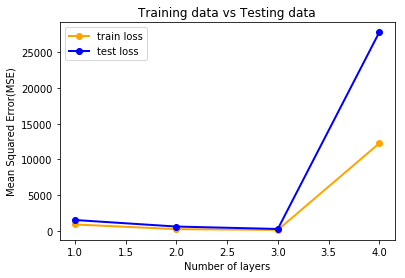

In [22]:
plt.plot(np.arange(1,len(loss)+1),loss, marker='o', color='orange', linewidth=2, label= 'train loss')
plt.plot(np.arange(1,len(loss)+1),test_loss, marker='o', color='blue', linewidth=2, label= 'test loss')
plt.xlabel('Number of layers')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('Training data vs Testing data')
# plt.axvline(x=4, linestyle='--', color='red')
plt.savefig('Training data vs Testing data.png')            
plt.legend()
plt.show()

In [23]:
# Regression model
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()
print (model.summary())
y_predict_regess = model.predict(X_test)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.333e+05
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:20:51   Log-Likelihood:                         -12835.
No. Observations:                2300   AIC:                                  2.568e+04
Df Residuals:                    2295   BIC:                                  2.571e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
# Best ANN model
y_predict_ann = nn_threeLayer.predict(X_test)

In [37]:
def SSE(y_true, y_predict):
    y_true = y_true.to_numpy()
    if len(y_true) != len(y_predict):
        return
    sse = 0
    for i in range(len(y_true)):
        sse += (y_true[i] - y_predict[i]) ** 2
    return sse

ann_sse = SSE(y_test,y_predict_ann)
regress_sse = SSE(y_test,y_predict_regess)

In [38]:
print ("Best ANN's SSE: {}".format(ann_sse))
print ("Best Regression's SSE: {}".format(regress_sse))

Best ANN's SSE: 77758.6941079954
Best Regression's SSE: 633402884.1532137
